In [1]:
import scipy as sp
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

from ggqpy import construct_Chebyshev_quadratures
from ggqpy.functionfamiliy import Interval
from ggqpy.testproblems import example_problem, gen_poly_and_sing
from ggqpy.discretize import Discretizer
from ggqpy.compress import compress_sequence_of_functions, visualise_diagonal_dropoff, construct_A_matrix
from ggqpy.optimize import QuadOptimizer
from ggqpy.visualize import plot_points

In [2]:
max_degree = 30
Y = lambda m,l: lambda theta, phi: sp.special.sph_harm(m,l,phi,theta)
# functions = [[lambda theta, phi: Y(m,l)(theta,phi) for m in range(-l, l+1)] for l in range(1,max_degree)]
functions = list()
for l in range(0, max_degree):
    max_m = min(l, 3)
    for m in range(-max_m, max_m + 1):
        functions.append(lambda theta, phi, m=m, l=l: np.sin(theta)*Y(m,l)(theta,phi))

# functions = list()
# par = lambda theta, phi: np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])
# for l in range(0, 200):
#     functions.append(lambda theta, phi: (np.random.normal() + 1j*np.random.normal())*(par(theta,phi)**(np.random.randint(0,max_degree, size=3)[:,np.newaxis])).sum(axis=0) + (np.random.normal() + 1j*np.random.normal())*(par(theta,phi)**(np.random.randint(0,max_degree, size=3)[:,np.newaxis])).sum(axis=0))


print(len(functions))

198


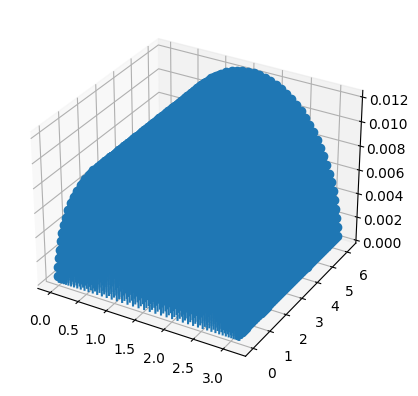

In [3]:
disc = Discretizer()
N = 50
M = 50
theta_d,phi_d,w_d,theta_l,phi_l = disc.naive_discretize2d_sphere(N, M)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
markerline, stemlines, baseline = ax.stem(theta_d,phi_d,w_d, basefmt=" ")
plt.show()

In [4]:
print(abs(np.sin(theta_d)@w_d - 4*np.pi))
print(abs(np.sin(theta_d)*Y(0,0)(theta_d,phi_d))@w_d - np.sqrt(4*np.pi))

for l in range(1,3):
    for m in range(-l, l+1):
        print((m,l), abs((np.sin(theta_d)*Y(m,l)(theta_d,phi_d))@w_d))

4.618527782440651e-14
-1.1546319456101628e-14
(-1, 1) 1.6755967177998616e-16
(0, 1) 1.638739819976318e-16
(1, 1) 1.6755967177998616e-16
(-2, 2) 4.974511174072988e-16
(-1, 2) 7.382697291358538e-18
(0, 2) 7.025399261227942e-16
(1, 2) 8.602717315167802e-18
(2, 2) 4.979638076292225e-16


(2500, 198)


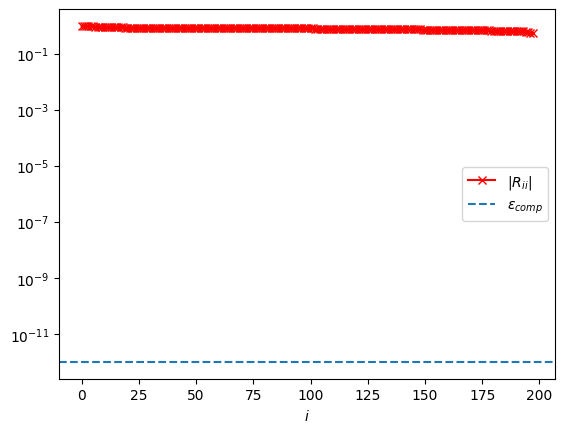

In [5]:
precision = 1e-12
U, rank = compress_sequence_of_functions(functions,(theta_d,phi_d),w_d,precision)
print(U.shape)
A = construct_A_matrix((theta_d,phi_d),w_d,functions)
visualise_diagonal_dropoff(A,precision)

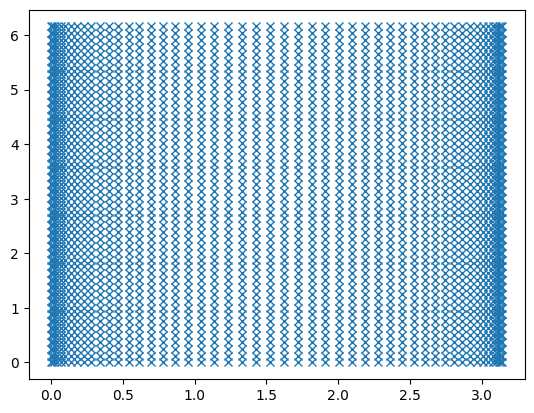

In [6]:
plt.plot(theta_d, phi_d,"x")

In [7]:
(theta_c,phi_c),w_c = construct_Chebyshev_quadratures((theta_d,phi_d),w_d,U)
print(abs(w_d@np.sin(theta_d) - 4*np.pi))
print(abs(w_c@np.sin(theta_c) - 4*np.pi))

4.618527782440651e-14
25.13274122871828


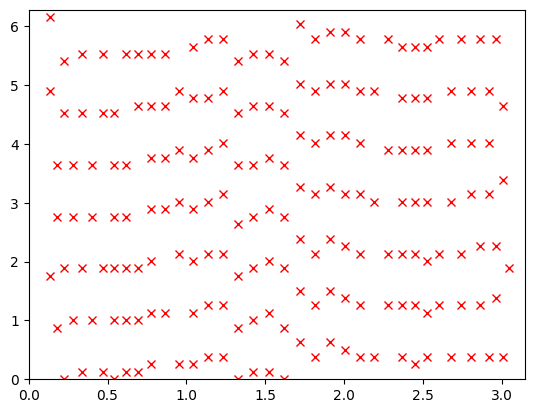

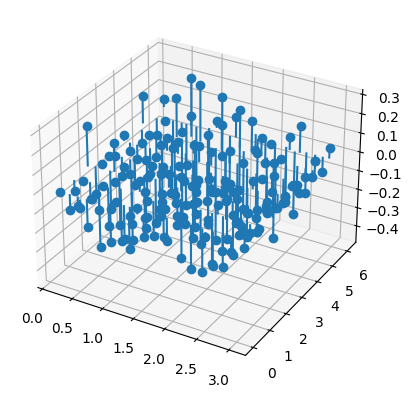

In [16]:

plt.plot(theta_c,phi_c,"rx")
plt.xlim(0,np.pi);
plt.ylim(0,2*np.pi);
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
markerline, stemlines, baseline = ax.stem(theta_c, phi_c, w_c.real, basefmt=" ")
plt.show()

In [14]:
print(max(w_c.imag))

4.71003978642655e-16


In [10]:
m,l = (2,10)
print((m,l), abs((np.sin(theta_c)*Y(m,l)(theta_c,phi_c))@w_c))

(2, 10) 9.276103345513797e-17


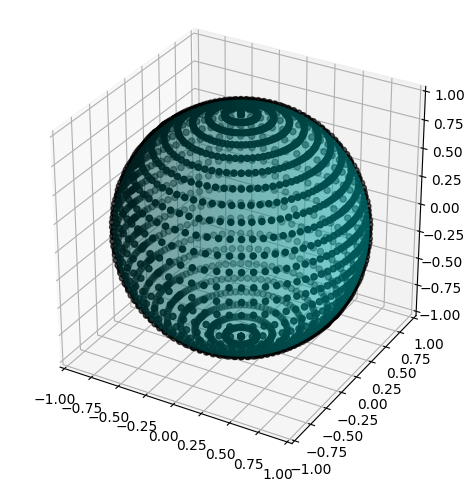

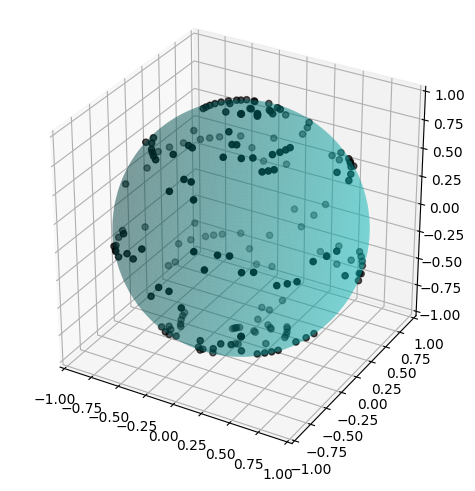

In [11]:
plot_points(theta_d,phi_d)
plot_points(theta_c,phi_c)